# Assignment2 - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [3]:
# stundent details:
# Gilad B. 9469                      
# Maor S. 9432
# Mor A. 1143     


## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name:ChatGPT
Goal: קבלת סיוע בכתיבת קוד פייתון לביצוע GridSearchCV, הנדסת מאפיינים וניתוח תוצאות 
Propmpt1: "כתוב לי קוד להרצת GridSearchCV עם רגרסיה ליניארית ו־Random Forest ב־scikit-learn" 
    
Propmpt2: "איך משלבים Feature Selection בתוך Pipeline של scikit-learn?"  
    
Propmpt3: "איך להציג טבלת השוואה בין מודלים עם התוצאות הכי טובות?"


AI agent name 2: Copilot
Goal:  השלמה אוטומטית של קטעי קוד והצעות לפתרון שגיאות  
Propmpt1:(לא בוצעו פניות ישירות – שימש בעיקר להשלמת קוד אוטומטית בזמן כתיבה ב־VS Code)
    
Propmpt2:
    
Propmpt3: 

Other assistanse:    
</pre>

<div dir="rtl">

### מטרת הפרויקט

מטרת הפרויקט היא לבנות מודל שיחזה את ערך הבית החציוני בשכונה מסוימת, בהתבסס על מאפיינים דמוגרפיים וגאוגרפיים שונים של כל אזור. 
מערך הנתונים כולל נתונים כמו הכנסה חציונית, גיל ממוצע של הבתים, מספר חדרים ממוצע, מספר תושבים ומיקום גאוגרפי (קו אורך ורוחב).

בעיית הלמידה היא בעיית חיזוי של ערך מספרי, כלומר חיזוי ערך רציף בהתבסס על משתנים מספריים נוספים.  
במהלך העבודה נבצע ניתוח ראשוני של הנתונים, נבחן אילו מאפיינים משפיעים על ערך הבית, ונבדוק אילו שיטות חיזוי מספקות את התוצאות הטובות ביותר.

</div>



## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>
The California Housing dataset is a classic regression problem  
where the goal is to predict the median house value in different districts of California.  

The dataset includes 20,640 rows,  
each representing a block group with aggregated information like median income,  
average rooms per household, population, and location (latitude and longitude).  

The target variable is the median house value, given in units of $100,000.  

All features are numeric and there are no missing values,  
which makes the data clean and ready to use for regression models without heavy preprocessing.
</pre>


## Part 2 - Initial Preparations 
You could add as many code cells as needed

## טעינת הנתונים והכנה ראשונית 

In [11]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression

In [12]:
# קריאה לקבצי האימון והבדיקה
df_train = pd.read_csv("housing_train.csv")
# הצגת חמש השורות הראשונות מנתוני האימון
df_train.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,4.0179,46.0,4.158690,1.032746,512.0,1.289673,34.07,-118.35,3.500
1,2.7002,6.0,4.149245,1.179989,4092.0,2.287311,34.05,-117.31,0.883
2,1.2762,17.0,3.432331,1.022556,1325.0,2.490602,34.42,-119.69,2.536
3,4.9342,23.0,5.735798,1.053201,4580.0,4.129847,34.04,-117.93,1.810
4,2.2755,21.0,4.064607,0.962079,2109.0,2.962079,32.58,-117.11,1.250


In [13]:
df_test = pd.read_csv("housing_test.csv")
df_test.head()




,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,5.3254,32.0,5.786260,1.033079,982.0,2.498728,34.29,-119.27,3.852
1,5.3032,52.0,5.095745,1.028369,980.0,3.475177,34.08,-118.12,2.457
2,4.1679,41.0,6.617486,1.371585,915.0,2.500000,37.05,-122.05,2.013
3,3.6429,28.0,5.249180,1.009836,848.0,2.780328,38.69,-121.41,1.052
4,2.7457,17.0,11.183267,2.107570,675.0,2.689243,38.88,-119.99,1.078


In [14]:
def preprocess_data(df):
    """
    מפצל את הדאטה ל־X ו־y.
    X יכיל רק עמודות מספריות כדי למנוע שגיאות באימון מודלים.
    """
    # משתנה המטרה
    y = df["MedHouseVal"]

    # הסרת העמודה מה־features
    X = df.drop("MedHouseVal", axis=1)

    # סינון – רק מספרים אמיתיים 
    X = X.select_dtypes(include=["int64", "float64", "int32", "float32"])

    return X, y


## ניתוח נתונים חוקר EDA

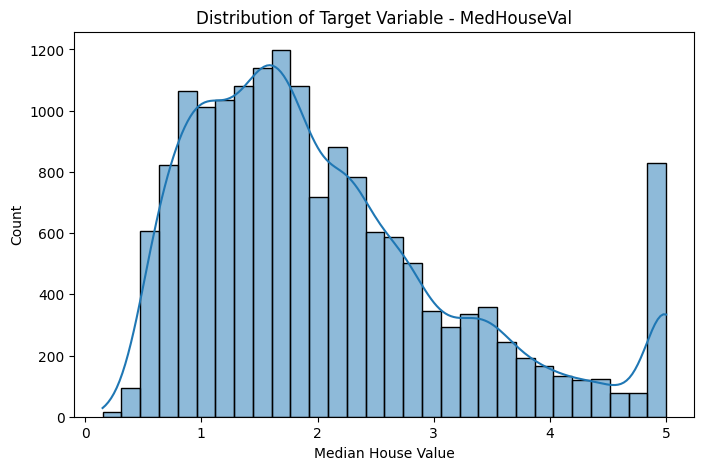

In [16]:
# גרף התפלגות של ערך הבית החציוני (MedHouseVal)
# מטרת הוויזואליזציה: לבדוק את צורת ההתפלגות של המשתנה התלוי ולזהות אם יש צורך בטרנספורמציה
# חלק מניתוח תוצאות (flow)

plt.figure(figsize=(8,5))
sns.histplot(df_train["MedHouseVal"], bins=30, kde=True)
plt.title("Distribution of Target Variable - MedHouseVal")
plt.xlabel("Median House Value")
plt.ylabel("Count")
plt.show()

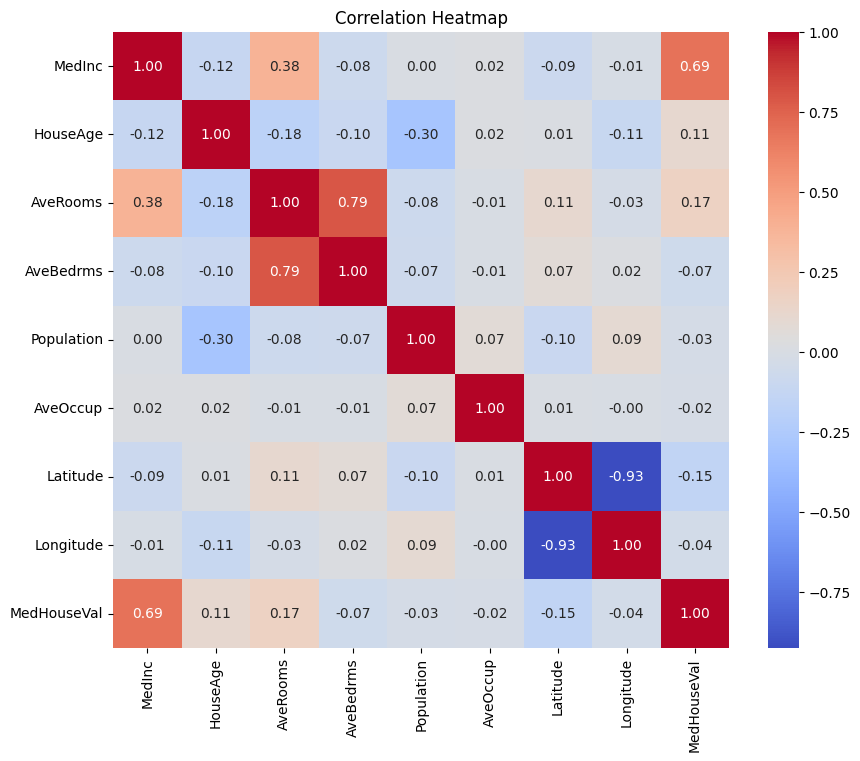

In [17]:
# מפת חום של המתאם בין תכונות שונות בנתונים
# מטרת הוויזואליזציה: לזהות תכונות עם מתאם גבוה במיוחד או קשר חזק למשתנה המנובא
# חלק מ־ feature engineering – עוזר לבחור תכונות חזקות ולהסיר תכונות עם מתאם עודף


numeric_df = df_train.select_dtypes(include=[np.number])
corr = numeric_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()


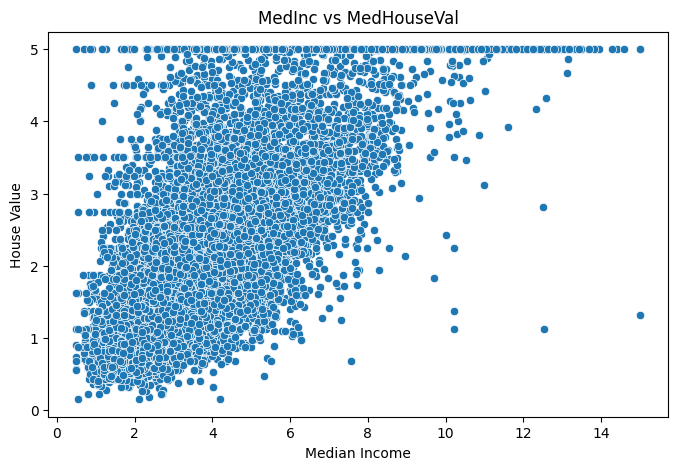

In [18]:
# פיזור בין הכנסה חציונית לערך הבית
# מטרת הוויזואליזציה: לבדוק האם הקשר לינארי (ולכן מתאים לרגרסיה), לזהות חריגים
# חלק מהניתוח שמסייע לבחירת סוג המודל (flow)

plt.figure(figsize=(8,5))
sns.scatterplot(data=df_train, x="MedInc", y="MedHouseVal")
plt.title("MedInc vs MedHouseVal")
plt.xlabel("Median Income")
plt.ylabel("House Value")
plt.show()

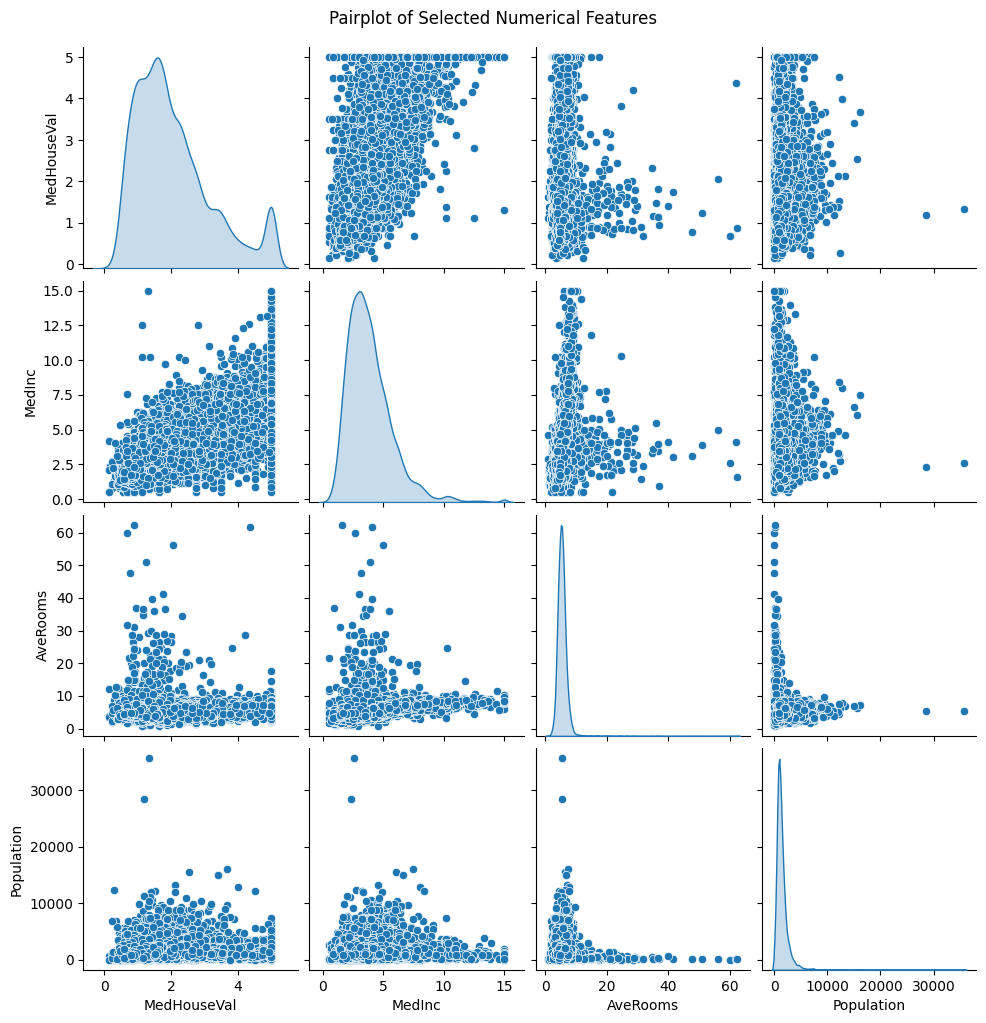

In [19]:
# מטרת הוויזואליזציה: לבחון האם קיימים קשרים ליניאריים (או לא ליניאריים) בין משתנים שונים
# ניתוח זה עוזר לזהות זוגות משתנים שיכולים להשפיע על מחיר הבית ולשקול אותם כחלק מה- feature engineering
# בנוסף – מאפשר לאתר התפלגויות לא נורמליות וחריגים (outliers) שעלולים להטות את המודל

sns.pairplot(
    df_train[["MedHouseVal", "MedInc", "AveRooms", "Population"]],
    diag_kind="kde"
)
plt.suptitle("Pairplot of Selected Numerical Features", y=1.02)
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

In [21]:
# ============================
# חלק 3 - ניהול ניסויים עם feature engineering ו-CV
# ============================

from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import pandas as pd
from IPython.display import display

def run_grid_search_with_feature_engineering(X, y):
    """
    מריץ GridSearchCV עם 5-fold על מספר מודלים, תוך שילוב feature engineering כחלק מה-Pipeline
    מחזיר DataFrame עם השוואה בין התוצאות
    """

    pipelines = []

    # Linear Regression - ללא עיבוד
    pipelines.append({
        'name': 'Linear (Raw)',
        'pipeline': Pipeline([
            ('model', LinearRegression())
        ]),
        'params': {
            'model': [LinearRegression()]
        }
    })

    # Linear Regression עם StandardScaler
    pipelines.append({
        'name': 'Linear (Scaled)',
        'pipeline': Pipeline([
            ('scaler', StandardScaler()),
            ('model', LinearRegression())
        ]),
        'params': {
            'model': [LinearRegression()]
        }
    })

    # Ridge Regression עם סקלר ו-SelectKBest
    pipelines.append({
        'name': 'Ridge + Feature Selection',
        'pipeline': Pipeline([
            ('scaler', StandardScaler()),
            ('select', SelectKBest(score_func=f_regression)),
            ('model', Ridge())
        ]),
        'params': {
            'select__k': [5, 7],
            'model__alpha': [0.1, 1.0, 10.0]
        }
    })

    # LASSO 
    pipelines.append({
        'name': 'LASSO (Scaled)',
        'pipeline': Pipeline([
            ('scaler', StandardScaler()),
            ('model', Lasso())
        ]),
        'params': {
            'model__alpha': [0.01, 0.1, 1.0],
            'model__max_iter': [1000, 3000]
        }
    })

    # Random Forest Regressor
    pipelines.append({
        'name': 'Random Forest',
        'pipeline': Pipeline([
            ('scaler', StandardScaler()),
            ('model', RandomForestRegressor(random_state=42))
        ]),
        'params': {
        'model__n_estimators': [30],
        'model__max_depth': [10],
        'model__min_samples_split': [2]
        }
    })

    results = []
    models_objects = {}

    for pipe in pipelines:
        print(f"\n running...: {pipe['name']}")
        grid = GridSearchCV(pipe['pipeline'], pipe['params'], cv=5, scoring='r2', n_jobs=-1)
        grid.fit(X, y)

        best_score = grid.best_score_
        best_params = grid.best_params_
        results.append({
            'Model': pipe['name'],
            'Best R²': best_score,
            'Best Params': best_params
        })

        # שומר את אובייקט המודל הטוב ביותר
        models_objects[pipe['name']] = grid.best_estimator_

        print(f"--> Best R²: {best_score:.4f}")
        print(f"--> Best Params: {best_params}")

    results_df = pd.DataFrame(results)
    print("\n Model comparison table:")
    display(results_df)

    return results_df, models_objects



## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

## אימון וחיזוי 

In [24]:
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    print(f"\n Results on the test set: R² = {r2:.4f}, MSE = {mse:.4f}")
    return y_pred

## Part 5 - Apply on test and show model performance estimation

In [26]:
def show_predictions(y_test, y_pred):
    df = pd.DataFrame({
        'Actual': y_test.values[:5],
        'Predicted': y_pred[:5]
    })
    print("\n train VS test (5 examples):")
    display(df)


In [27]:
# 4. עיבוד מקדים (X, y)
X_train, y_train = preprocess_data(df_train)
X_test, y_test = preprocess_data(df_test)

In [28]:
# 5. GridSearch עם Feature Engineering ו-CV
grid_results_df, model_dict = run_grid_search_with_feature_engineering(X_train, y_train)


 running...: Linear (Raw)
--> Best R²: 0.6048
--> Best Params: {'model': LinearRegression()}

 running...: Linear (Scaled)
--> Best R²: 0.6048
--> Best Params: {'model': LinearRegression()}

 running...: Ridge + Feature Selection
--> Best R²: 0.6045
--> Best Params: {'model__alpha': 10.0, 'select__k': 7}

 running...: LASSO (Scaled)
--> Best R²: 0.6017
--> Best Params: {'model__alpha': 0.01, 'model__max_iter': 1000}

 running...: Random Forest
--> Best R²: 0.7704
--> Best Params: {'model__max_depth': 10, 'model__min_samples_split': 2, 'model__n_estimators': 30}

 Model comparison table:


,Model,Best R²,Best Params
0,Linear (Raw),0.604824,{'model': LinearRegression()}
1,Linear (Scaled),0.604824,{'model': LinearRegression()}
2,Ridge + Feature Selection,0.604478,"{'model__alpha': 10.0, 'select__k': 7}"
3,LASSO (Scaled),0.601682,"{'model__alpha': 0.01, 'model__max_iter': 1000}"
4,Random Forest,0.770432,"{'model__max_depth': 10, 'model__min_samples_s..."


In [29]:

# 6. בחירת המודל הטוב ביותר לפי הטבלה
best_idx = grid_results_df['Best R²'].idxmax()
best_model_name = grid_results_df.loc[best_idx, 'Model']
best_model = model_dict[best_model_name]

print(f"\n selected model: {best_model_name}")


 selected model: Random Forest


In [30]:
# חיזוי על סט הבדיקה
y_pred = best_model.predict(X_test)

# הערכת ביצועי המודל
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"\n result of test group:\nR² = {r2:.4f}, MSE = {mse:.4f}")

# הצגת דוגמאות
show_predictions(y_test, y_pred)



 result of test group:
R² = 0.7896, MSE = 0.2855

 train VS test (5 examples):


,Actual,Predicted
0,3.852,3.353963
1,2.457,2.512724
2,2.013,2.377229
3,1.052,1.281298
4,1.078,1.165679


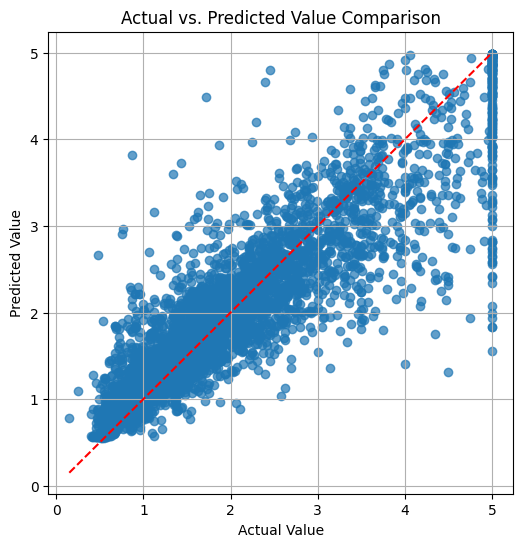

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Actual vs. Predicted Value Comparison")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # קו אידיאלי
plt.grid(True)
plt.show()